In [10]:
import numpy as np
import sklearn
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Exercise 1

In [2]:
# Open the files and store all the articles in the variable reuters
nb_files = 22
reuters = []
for i in range(nb_files):
    with open("full/reuters-0"+str(i)+".json") as file:
        text = json.load(file)
    reuters = reuters + text
len(reuters)

21578

In [3]:
# Only keep articles that have a body and at least one topic
c = 0
for i in range(len(reuters)):
    if 'body' not in reuters[i-c]:
        del reuters[i-c]
        c += 1
    if 'topics' not in reuters[i-c]:
        del reuters[i-c]
        c += 1
    elif len(reuters[i-c]['topics']) == 0:
        del reuters[i-c]
        c += 1
len(reuters)

10377

In [4]:
# Store only the content of all the articles in reutersBody
reutersBody = []
for element in reuters:
    reutersBody.append(element['body'])
len(reutersBody)

10377

In [11]:
# Create a bag of words with CountVectorizer
vectorizer = CountVectorizer(stop_words='english', lowercase=True, analyzer='word')
bagWords = vectorizer.fit_transform(reutersBody)

In [12]:
# With this method we get 28150 features
bagWords.shape

(10377, 28150)

In [13]:
# Create a hash feature function using the function hash (predefined in python) on each word of the article
# N is the number of features at the end
def hash_feature(text, N):
    words = str.split(text.lower())
    result = [0]*N
    for word in words:
        hashed_word = hash(word) % N
        result[hashed_word] += 1
    return result

In [14]:
# Process a hash feature on all the articles and store in hashedFeatures (array of 10377x1000)
hashedFeatures = []
nbFeatures = 1000
for text in reutersBody:
    hashedFeatures.append(hash_feature(text, nbFeatures))
len(hashedFeatures)

10377

In [17]:
# Create the target values: 0 or 1 whether the topic "earn" describes the article or not
targetValues = []
for element in reuters:
    if 'earn' in element['topics']:
        targetValues.append(1)
    else:
        targetValues.append(0)
len(targetValues)

10377

In [19]:
# Split the dataset into training and test sets and KEEP the distribution of 1 and 0 in both training and test sets
# to avoid any bias

# for the bag of words
XtrainB, XtestB, ytrainB, ytestB = train_test_split(bagWords, targetValues, test_size=0.2, stratify=targetValues)

# for the hashing feature
XtrainH, XtestH, ytrainH, ytestH = train_test_split(hashedFeatures, targetValues, test_size=0.2, stratify=targetValues)

In [20]:
# Create the random forest classifiers with 50 trees
classifierB = RandomForestClassifier(n_estimators=50)
classifierH = RandomForestClassifier(n_estimators=50)

In [21]:
# Train the classifiers
classifierB.fit(XtrainB, ytrainB)
classifierH.fit(XtrainH, ytrainH)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
print("The precision for the classifier using a bag of words is: " + str(classifierB.score(XtestB, ytestB)))

The precision for the classifier using a bag of words is: 0.965799614644


In [24]:
print("The precision for the classifier using a hashing feature is: " + str(classifierH.score(XtestH, ytestH)))

The precision for the classifier using a hashing feature is: 0.945086705202


# Exercise 2

In [25]:
from scipy import misc
from matplotlib import pyplot as plt

In [26]:
# From an image of 8x9 pixels, compare adjacent values for each row and return True if x>y, False otherwise
# In the end, we get a 8x8 boolean array
def compare_adjacent_values(image):
    new_array = []
    for row in image:
        new_row = []
        for i in range(len(row)-1):
            if row[i]>row[i+1]:
                new_row.append(True)
            else:
                new_row.append(False)
        new_array.append(new_row)
    return new_array

In [27]:
# From a boolean array, create a hashing function
def hash_differences(image_differences):
    hash_result = ''
    for difference in image_differences:
        decimal_value = 0
        hex_string = []
        for index, value in enumerate(difference):
            if value:
                decimal_value += 2**(index % 8)
            if (index % 8) == 7:
                hex_string.append(hex(decimal_value)[2:].rjust(2, '0'))
                decimal_value = 0
        hash_result += hex_string[0]
    return hash_result

In [28]:
# From a image file path, hash the image
def hash_image(file):
    # load the image into grayscale
    image = misc.imread(file, mode="L")
    # Plot the image 
    plt.imshow(image,cmap='gray')
    plt.show()
    # Resize the image into 8x9 pixel image
    imageResized = misc.imresize(image, size=(8,9))
    # Create the boolean array
    image_differences = compare_adjacent_values(imageResized)
    # print the image hashing
    print(hash_differences(image_differences))

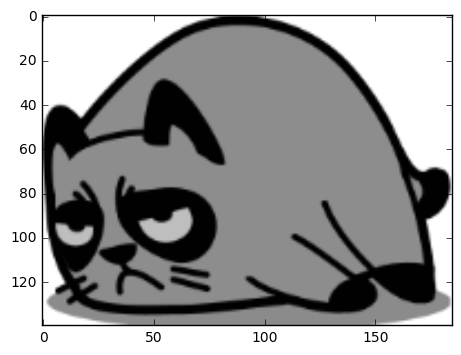

0f132346e2357127


In [32]:
hash_image('cat1.png')

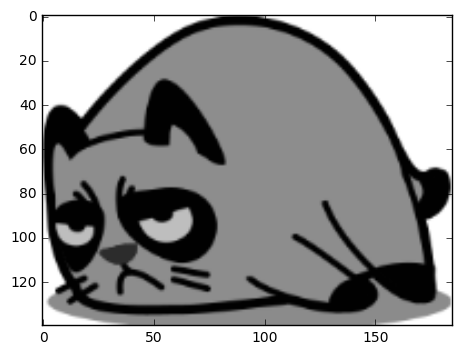

0f132346e2357327


In [33]:
hash_image('cat2.png')